<!DOCTYPE html>
<html>
<head>
<title>Cohort Analysis in Python</title>
</head>
<body>
<h1>Cohort Analysis in Python: A Comprehensive Guide</h1>
<p>This repository provides a step-by-step guide to performing cohort analysis in Python. Leveraging the power of Pandas, you'll learn how to create customer cohorts, calculate essential metrics, and visualize trends to extract valuable insights from your e-commerce data.</p>
<h2>Key Topics Covered:</h2>
<ul>
<li>Introduction to cohort analysis</li>
<li>Cohort creation and manipulation</li>
<li>Calculation of key metrics (retention, average order value)</li>
<li>Data visualization techniques</li>
<li>Practical applications and use cases</li>
</ul>
<h2>Prerequisites:</h2>
<ul>
<li>Basic Python programming knowledge</li>
<li>Familiarity with Pandas library</li>
</ul>
<p>By the end of this guide, you'll be equipped to conduct in-depth cohort analyses and extract actionable insights from your e-commerce data.</p>


<p>The granularity of this cohort analysis is month.</p>
    
</body>
</html>


<h4>Requirements file</h4>

In [2]:
!pip freeze > txt/cohort_requirements.txt

<h1>Import packages</h1>

In [580]:
import pandas as pd
# import missingno as msno
from textwrap import wrap
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib as mpl
from cycler import cycler

import numpy as np
import os as os
import time
import pprint
import sys
import re
import json
import itertools
import datetime as dt


<h1>Set up</h1>

In [581]:
cwd=os.getcwd()
# print(cwd)

In [582]:
!conda list -> txt/cohort.txt

<h1>Import data</h1>

In [583]:
online = pd.read_csv(f'data/online.csv', header=0, sep=',', index_col=0,
                     parse_dates=['InvoiceDate'])
# date_format="%Y-%m-%d %H:%M:%S"

<h1>Inspecting the data</h1>

In [584]:
print(online.shape)

(70864, 8)


In [585]:
print(online.columns.tolist())

['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']


In [586]:
print(online.info())

<class 'pandas.core.frame.DataFrame'>
Index: 70864 entries, 416792 to 312243
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    70864 non-null  int64         
 1   StockCode    70864 non-null  object        
 2   Description  70864 non-null  object        
 3   Quantity     70864 non-null  int64         
 4   InvoiceDate  70864 non-null  datetime64[ns]
 5   UnitPrice    70864 non-null  float64       
 6   CustomerID   70864 non-null  int64         
 7   Country      70864 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 4.9+ MB
None


In [587]:
print(online.head(2))

        InvoiceNo StockCode                    Description  Quantity  \
416792     572558     22745     POPPY'S PLAYHOUSE BEDROOM          6   
482904     577485     23196  VINTAGE LEAF MAGNETIC NOTEPAD         1   

               InvoiceDate  UnitPrice  CustomerID         Country  
416792 2011-10-25 08:26:00       2.10       14286  United Kingdom  
482904 2011-11-20 11:56:00       1.45       16360  United Kingdom  


In [588]:
print(online.dtypes)

InvoiceNo               int64
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
dtype: object


In [589]:
var_n = online.select_dtypes(include='number').describe()
var_n 

,InvoiceNo,Quantity,UnitPrice,CustomerID
count,70864.000000,70864.000000,70864.000000,70864.00000
mean,560639.843136,11.511233,3.063033,15552.19790
std,13176.494003,41.017582,31.894970,1595.50593
min,536365.000000,1.000000,0.001000,12747.00000
25%,549128.000000,2.000000,1.250000,14194.00000
50%,562012.500000,4.000000,1.950000,15525.00000
75%,572283.000000,12.000000,3.750000,16931.00000
max,581586.000000,4300.000000,8142.750000,18287.00000


<h3>Inspect dates</h3>

In [590]:
online['InvoiceDate'].describe()

count                            70864
mean     2011-07-11 01:25:32.900767744
min                2010-12-01 08:26:00
25%                2011-04-06 14:25:00
50%                2011-08-01 13:59:30
75%                2011-10-23 11:42:00
max                2011-12-09 12:49:00
Name: InvoiceDate, dtype: object

In [591]:
days=online['InvoiceDate'].dt.day
dates=online['InvoiceDate'].dt.date
years=online['InvoiceDate'].dt.year
months=online['InvoiceDate'].dt.month


print(dates.sort_values()[:5])
print('----------------------------------')
print(dates.sort_values().tail())
print('----------------------------------')
print(months.value_counts().sort_values())
print('----------------------------------')
print(years.value_counts())

2306    2010-12-01
1151    2010-12-01
2428    2010-12-01
2089    2010-12-01
686     2010-12-01
Name: InvoiceDate, dtype: object
----------------------------------
541572    2011-12-09
541850    2011-12-09
540408    2011-12-09
541615    2011-12-09
540412    2011-12-09
Name: InvoiceDate, dtype: object
----------------------------------
InvoiceDate
1      3580
2      3648
4      4148
7      4610
6      4669
8      4744
3      4764
5      5018
9      7189
12     8042
10     8808
11    11644
Name: count, dtype: int64
----------------------------------
InvoiceDate
2011    65971
2010     4893
Name: count, dtype: int64


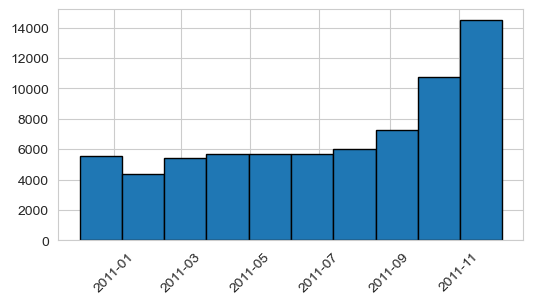

In [592]:
online['InvoiceDate'].hist(edgecolor='black', figsize=(6,3))
plt.xticks(rotation=45)
plt.show()

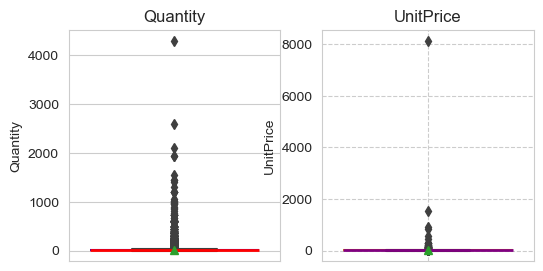

In [593]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3))

sns.set_style('whitegrid')

# Define colors for box elements
box_color = 'blue'
median_color = 'red'
whisker_color = 'gray'

# Apply colors to boxplot elements
ax1 = sns.boxplot(
    data=online,
    y='Quantity',
    ax=ax1,
    showmeans=True, 
    boxprops=dict(color=box_color),
    medianprops=dict(linewidth=2, color=median_color),
    whiskerprops=dict(color=whisker_color),
)
ax1.set_title('Quantity')


ax2 = sns.boxplot(
    data=online,
    y='UnitPrice',
    ax=ax2,
    showmeans=True,
    boxprops=dict(color='orange'),
    medianprops=dict(linewidth=2, color='purple'),
    whiskerprops=dict(color='green'),
)
ax2.set_title('UnitPrice')

fig = plt.grid(linestyle='dashed')

plt.show()


<h3>Outliers</h3>

In [594]:
online_sample = online.sample(frac=0.25)
print(online_sample.shape)

(17716, 8)


In [595]:
# Create a copy of the online DataFrame
online_2 = online.copy()

online_2.replace([np.inf, -np.inf], np.nan, inplace=True)
online_2.dropna(subset=['Quantity', 'UnitPrice'], inplace=True)

# Create a boolean mask for filtering
boolean_mask_2 = \
(online_2['Quantity'] <= 1000) & (online_2['UnitPrice'] <= 1000)

# Apply the mask to filter the DataFrame
online_2 = online_2[boolean_mask_2]

# Display information about the filtered DataFrame
online_2.info()


<class 'pandas.core.frame.DataFrame'>
Index: 70844 entries, 416792 to 312243
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    70844 non-null  int64         
 1   StockCode    70844 non-null  object        
 2   Description  70844 non-null  object        
 3   Quantity     70844 non-null  int64         
 4   InvoiceDate  70844 non-null  datetime64[ns]
 5   UnitPrice    70844 non-null  float64       
 6   CustomerID   70844 non-null  int64         
 7   Country      70844 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 4.9+ MB


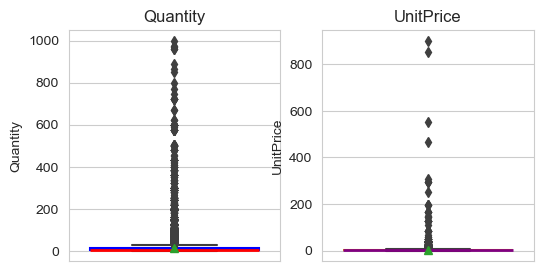

In [596]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3))

sns.set_style('whitegrid')

# Define colors for box elements
box_color = 'blue'
median_color = 'red'
whisker_color = 'gray'

# Apply colors to boxplot elements
ax1 = sns.boxplot(
    data=online_2,
    y='Quantity',
    ax=ax1,
    showmeans=True, 
    boxprops=dict(color=box_color),
    medianprops=dict(linewidth=2, color=median_color),
    whiskerprops=dict(color=whisker_color),
)
ax1.set_title('Quantity')


ax2 = sns.boxplot(
    data=online_2,
    y='UnitPrice',
    ax=ax2,
    showmeans=True,
    boxprops=dict(color='orange'),
    medianprops=dict(linewidth=2, color='purple'),
    whiskerprops=dict(color='green'),
)
ax2.set_title('UnitPrice')

plt.show()

In [597]:
online_3 = online_2[['InvoiceDate', 'UnitPrice', 'Quantity']]
online_3 = online_3.set_index('InvoiceDate')
print(online_3.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 70844 entries, 2011-10-25 08:26:00 to 2011-08-24 14:53:00
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   UnitPrice  70844 non-null  float64
 1   Quantity   70844 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 1.6 MB
None


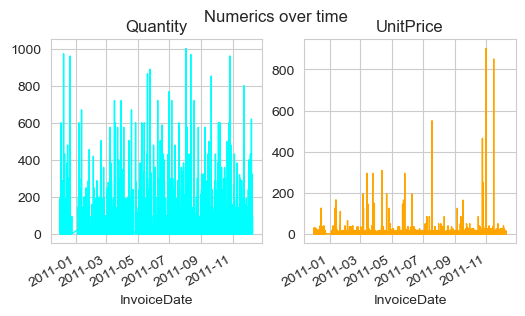

In [598]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(6,3))
plt.suptitle('Numerics over time')

online_3['Quantity'].plot(ax=ax1, title='Quantity', 
                          linewidth=1, color='cyan')
online_3['UnitPrice'].plot(ax=ax2, title='UnitPrice', 
                           linewidth=1, color='orange')
plt.show()

<h3>Missing values</h3>

In [599]:
online.isnull().sum()


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [600]:
online_3.isnull().sum()

UnitPrice    0
Quantity     0
dtype: int64

<h2>Cohort Analysis</h2>

In [601]:
def get_day_of_date(y):
    return dt.datetime(y.year, y.month, y.day)

In [602]:
online['InvoiceDay'] = online['InvoiceDate'].apply(get_day_of_date)

In [603]:
online[['InvoiceDay', 'InvoiceDate']].head(3)

,InvoiceDay,InvoiceDate
416792,2011-10-25,2011-10-25 08:26:00
482904,2011-11-20,2011-11-20 11:56:00
263743,2011-07-14,2011-07-14 13:35:00


<p>
Same as above using date to extract the date part.
</p>

In [604]:
def get_day_of_date_2(z):
    return z.date()

online_4 = online.copy()

online_4['InvoiceDay_date'] = online['InvoiceDate'].apply(get_day_of_date_2)
online_4[['InvoiceDay', 'InvoiceDate']].head(3)

,InvoiceDay,InvoiceDate
416792,2011-10-25,2011-10-25 08:26:00
482904,2011-11-20,2011-11-20 11:56:00
263743,2011-07-14,2011-07-14 13:35:00


<h4>Grouping by CustomerID</h4>

<p>
This gives all invoices issued for every unique customer.<br>
How many invoices did customer A received?
</p>

In [605]:
group_obj = online.groupby('CustomerID')['InvoiceDay']
print(type(group_obj))

<class 'pandas.core.groupby.generic.SeriesGroupBy'>


<p>
What is in the group obj stored?<br>
A list of invoice dates implying invoices issued for every unique customer id.
</p>

In [606]:
customer_invoice_days = {}
customer_invoice_days_len = {}

for customer, invoice_per_customer in group_obj:
    customer_invoice_days[customer] = list(invoice_per_customer)
    customer_invoice_days_len[customer] = len(list(invoice_per_customer))
    
dict(list(customer_invoice_days.items())[3:5])

{12820: [Timestamp('2011-09-26 00:00:00'),
  Timestamp('2011-10-26 00:00:00'),
  Timestamp('2011-09-26 00:00:00'),
  Timestamp('2011-09-26 00:00:00'),
  Timestamp('2011-10-26 00:00:00'),
  Timestamp('2011-09-26 00:00:00'),
  Timestamp('2011-12-06 00:00:00'),
  Timestamp('2011-01-17 00:00:00'),
  Timestamp('2011-10-26 00:00:00'),
  Timestamp('2011-01-17 00:00:00'),
  Timestamp('2011-10-26 00:00:00'),
  Timestamp('2011-12-06 00:00:00'),
  Timestamp('2011-12-06 00:00:00'),
  Timestamp('2011-10-26 00:00:00'),
  Timestamp('2011-10-26 00:00:00'),
  Timestamp('2011-10-26 00:00:00'),
  Timestamp('2011-12-06 00:00:00')],
 12822: [Timestamp('2011-09-30 00:00:00'),
  Timestamp('2011-09-13 00:00:00'),
  Timestamp('2011-09-30 00:00:00'),
  Timestamp('2011-09-13 00:00:00'),
  Timestamp('2011-09-13 00:00:00'),
  Timestamp('2011-09-13 00:00:00'),
  Timestamp('2011-09-13 00:00:00'),
  Timestamp('2011-09-13 00:00:00'),
  Timestamp('2011-09-13 00:00:00')]}

In [607]:
n_invoices_customer = \
pd.DataFrame(customer_invoice_days_len.items(), columns=['CustomerID', 'len']).\
sort_values(by='len', ascending=False).reset_index(drop=True)


n_invoices_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3701 entries, 0 to 3700
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   CustomerID  3701 non-null   int64
 1   len         3701 non-null   int64
dtypes: int64(2)
memory usage: 58.0 KB


In [608]:
n_invoices_customer.head()

,CustomerID,len
0,17841,1532
1,14096,1055
2,12748,967
3,14606,548
4,15311,469


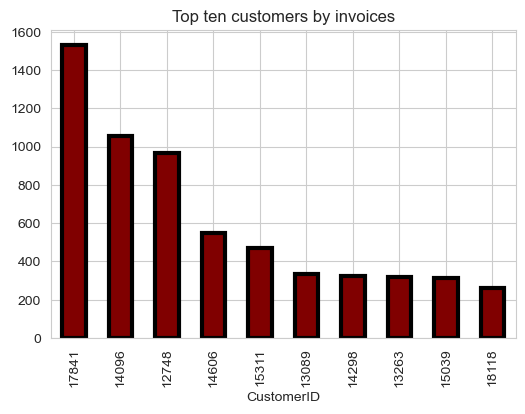

In [609]:

n_invoices_customer.head(10).plot.bar(x='CustomerID', y='len', legend=False,
                                      edgecolor='black', color='maroon', linewidth=3,
                                      xlabel='CustomerID',
                                      title='Top ten customers by invoices',
                                      figsize=(6,4))
plt.show()

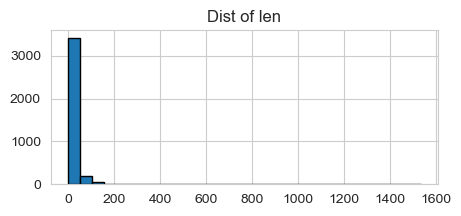

In [610]:
n_invoices_customer['len'].hist(bins=30, figsize=(5,2), edgecolor='black')
plt.title('Dist of len')
plt.show()

<h4>Selecting the minimum date value</h4>
<p>
or oldest, earliest date 
from the list of invoice dates created for every unique customer.
</p>

In [611]:
online['CohortDay']=group_obj.transform('min')
online['CohortDay'] = online['CohortDay'].dt.to_period('D')
online['Cohort_number']=online['CohortDay'].dt.day

In [612]:
online_subset_cohort_day = \
online[['CustomerID', 'InvoiceDay', 'InvoiceDate', 'CohortDay', 'Cohort_number']]

In [613]:
online_subset_cohort_day.head(3)

,CustomerID,InvoiceDay,InvoiceDate,CohortDay,Cohort_number
416792,14286,2011-10-25,2011-10-25 08:26:00,2011-04-11,11
482904,16360,2011-11-20,2011-11-20 11:56:00,2011-09-12,12
263743,13933,2011-07-14,2011-07-14 13:35:00,2011-07-14,14


In [614]:
cohort_size = online_subset_cohort_day['Cohort_number'].value_counts()
cohort_size.index.name = 'Cohort name and size'
cohort_size.head()

Cohort name and size
1    5702
5    5651
8    4371
6    3945
9    3268
Name: count, dtype: int64

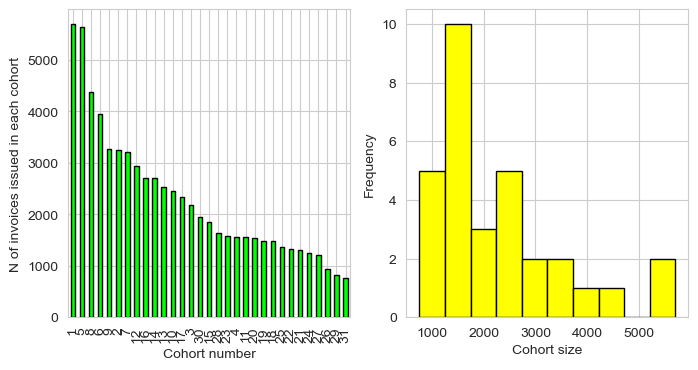

In [615]:
fig, (ax1, ax2) =plt.subplots(1,2, figsize=(8,4))

cohort_size.plot.bar(ax=ax1, xlabel='Cohort number', ylabel='N of invoices issued in each cohort',
                     edgecolor='black', color='lime')
cohort_size.plot.hist(ax=ax2, edgecolor='black', color='yellow', xlabel='Cohort size')
plt.show()

<h4>Calculating the time-offset</h4>

<p>
The goal is to understand user behavior, when they making a buying decision, <br>
relative to the time of their first purchase.
</p>

<p>
<b>What is the time offset?</b><br>
The difference between the transaction time and the reference time is the time offset.<br>
The reference time is the time the user made the first action.<br>
In this case received the first invoice, <br>
signalling the first purchase an invoice was issued for.
</p>


</p>
This was calculated with "online['CohortDay']=group_obj.transform('min')".<br>
The transaction time is the time the same user received an invoice <br> 
at anytime in the future along the timeline of the cohorts.<br>
In the example below the granularity is days.<br>
</p>

<p>

<p>
<b>What do we need to do at first?</b><br>
As stated the time offset is calculated by subtracting<br>
the reference date from the transaction date for each cohort.<br>
We need a function to extract the time components in a clear, transparent and concise way.
</p>

In [616]:
def get_date_components(df, date_col):
    """ returns extracted year, month, day from a datetime var. 
        It throws an error if not datetime."""
    
    try:
        pd.api.types.is_datetime64_dtype(df[date_col])
    except (TypeError):
        return 'TypeError'
        
    
    year = df[date_col].dt.year
    month = df[date_col].dt.month
    day = df[date_col].dt.day
    
    return year, month, day
    
print(help(get_date_components))

Help on function get_date_components in module __main__:

get_date_components(df, date_col)
    returns extracted year, month, day from a datetime var. 
    It throws an error if not datetime.

None


<h4>Invoice compos</h4>

<p>
Looking into it.
</p>


In [617]:
invoice_year, invoice_month, invoice_day = get_date_components(online, 'InvoiceDate')

In [618]:
df_invoice_compos = \
pd.DataFrame(list(zip(invoice_year, invoice_month, invoice_day)), 
             columns=['invoice_year', 'invoice_month', 'invoice_day'])


print(df_invoice_compos.head())

print('---------------------------------------------------------')

df_invoice_compos['invoice_year'].value_counts()

   invoice_year  invoice_month  invoice_day
0          2011             10           25
1          2011             11           20
2          2011              7           14
3          2011             11           23
4          2011              5           25
---------------------------------------------------------


invoice_year
2011    65971
2010     4893
Name: count, dtype: int64

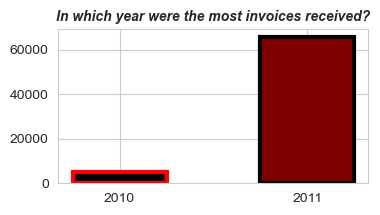

In [619]:
vc_invoice_compo_year = df_invoice_compos['invoice_year'].value_counts()

plt.figure(figsize=(4, 2))

plt.bar(vc_invoice_compo_year.index, vc_invoice_compo_year, 
        edgecolor=['black', 'red'], linewidth=3,
        color=['maroon', 'black'], width=0.5)

plt.xticks(ticks=[2011, 2010], labels=['2011', '2010'])

plt.title('In which year were the most invoices received?', fontsize=10, fontstyle='oblique',
           weight='bold')

plt.show()

<h4>Cohort compos</h4>

<p>
Understand the extracted compos by looking into it.
</p>

In [620]:
# online.info()
# online.head()

cohort_year, cohort_month, cohort_day = get_date_components(df=online, date_col="CohortDay")

In [621]:
df_cohort_compos = \
pd.DataFrame(list(zip(cohort_year, cohort_month, cohort_day)),
             columns=['cohort_year', 'cohort_month', 'cohort_day'])

df_cohort_compos.head()

,cohort_year,cohort_month,cohort_day
0,2011,4,11
1,2011,9,12
2,2011,7,14
3,2011,11,23
4,2011,2,25


In [622]:
vc_month_cohorts =df_cohort_compos.cohort_month.value_counts().sort_index()
print(vc_month_cohorts)

cohort_month
1      8398
2      5794
3      6396
4      3540
5      2753
6      2388
7      1927
8      2394
9      2740
10     3096
11     2351
12    29087
Name: count, dtype: int64


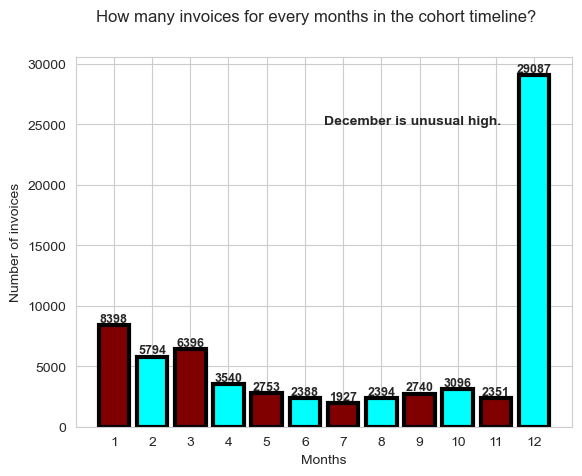

In [623]:
plt.figure()

plt.suptitle('How many invoices for every months in the cohort timeline?')

fig.add_subplot(1,1,1)

plt.bar(x=vc_month_cohorts.index.tolist(), height=vc_month_cohorts, 
        edgecolor='black', linewidth=3, color=['maroon', 'cyan'])

plt.xticks(ticks=vc_month_cohorts.index.tolist(),  labels=vc_month_cohorts.index.tolist())
plt.xlabel('Months')
plt.ylabel('Number of invoices')

for e, v in enumerate(vc_month_cohorts):
    plt.text(e+1, v+1.1, f'{v}', fontsize=9, weight='bold', ha='center', va='bottom')
    
plt.annotate(text='December is unusual high.', 
             xy=(6.5, 25000), weight='bold')

plt.show()

<p>Going ahead after have looked into the extracted compos.</p>

<h4>Time offset</h4>


<p>
Checking out below the invoice_year and cohort_year variables.
</p>

In [624]:
# invoice_year, invoice_month, invoice_day = get_date_components(online, 'InvoiceDate')
# cohort_year, cohort_month, cohort_day = get_date_components(df=online, date_col="CohortDay")

year_df = pd.DataFrame(list(zip(invoice_year, cohort_year)), 
                       columns=['invoice_year', 'cohort_year'])

year_df['Match?'] = np.where(year_df['invoice_year'] == year_df['cohort_year'], 1, 0 ) 
n_matches = year_df['Match?'].sum()

print(f'Number of matches: {n_matches}')
print('----------------------------------------------')
print(year_df['Match?'].value_counts())

# print(year_df.info())

Number of matches: 46878
----------------------------------------------
Match?
1    46878
0    23986
Name: count, dtype: int64


In [625]:
differences_years = invoice_year - cohort_year

print(type(differences_years))
print('----------------------') 
print(len(differences_years))
print('----------------------') 
print(differences_years.sum())
print('----------------------') 
print(differences_years[:5])

<class 'pandas.core.series.Series'>
----------------------
70864
----------------------
23986
----------------------
416792    0
482904    0
263743    0
495549    0
204384    0
dtype: int64


In [626]:
differences_month = invoice_month - cohort_month

print(type(differences_month))
print('----------------------') 
print(len(differences_month))
print('----------------------') 
print(differences_month.sum())
print('----------------------') 
print(differences_month[:5])

<class 'pandas.core.series.Series'>
----------------------
70864
----------------------
-2138
----------------------
416792    6
482904    2
263743    0
495549    0
204384    3
dtype: int64


<p>
It is possible for months_diff to be negative in the calculation 
if the invoice_month is earlier in the year than the cohort_month. 
This situation can occur when an invoice date falls in an earlier month 
of a later year compared to the cohort month. 
The formula to calculate the cohort index or time offset should account for this. 
</p>

In [627]:
differences_day = invoice_day - cohort_day

print(len(differences_day))
print('----------------------') 
print(differences_day.sum())
print('----------------------') 
print(differences_day[:5])

70864
----------------------
191127
----------------------
416792    14
482904     8
263743     0
495549     0
204384     0
dtype: int64


<h3>Cohort Index</h3>

<p>
which is is the time setoff or the difference between transaction<br>
and reference in the choosen 
time period granularity:<br>
day, weeks, months, quarter, years.
</p>

<p>
<b>What is the granularity of the time offset?</b><br>
It is the time period in which the time offset is expressed.<br>
Usual time periods are for example years, quarter, month, weeks, days.<br>
All time differences of a date "2011-03-28",<br> 
which are not days (28) must be converted to days.<br>
A year has 365 days therefore the conversion is "year difference * 365". 
</p>


In [628]:
online['CohortIndex']=differences_years*365 + differences_month*30 + differences_day + 1

print(online['CohortIndex'].head())

416792    195
482904     69
263743      1
495549      1
204384     91
Name: CohortIndex, dtype: int64


<h4>How many cohorts or unique cohort index number are there?</h4>

In [629]:
invoice_date_range = online['InvoiceDate'].max() - online['InvoiceDate'].min() 

print(invoice_date_range)
print(len(online['CohortIndex'].unique()))

373 days 04:23:00
374


<p>
Adding +1 to the CohortIndex calculation is a standard approach to make the periods more intuitive and to ensure that the first period starts at 1. This helps in making the cohort analysis more readable and consistent.
</p>

In [630]:
online.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'InvoiceDay', 'CohortDay',
       'Cohort_number', 'CohortIndex'],
      dtype='object')

In [631]:
cohort_features = online[['CustomerID', 'CohortDay', 'Cohort_number', 'CohortIndex']]
print(cohort_features.info())

<class 'pandas.core.frame.DataFrame'>
Index: 70864 entries, 416792 to 312243
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype    
---  ------         --------------  -----    
 0   CustomerID     70864 non-null  int64    
 1   CohortDay      70864 non-null  period[D]
 2   Cohort_number  70864 non-null  int64    
 3   CohortIndex    70864 non-null  int64    
dtypes: int64(3), period[D](1)
memory usage: 2.7 MB
None


In [632]:
grouping_cohort_data = online.groupby(['CohortDay', 'CohortIndex'])

grouping_cohort_data_dict = dict()

for a, b in grouping_cohort_data:
    grouping_cohort_data_dict[a] = b

# dict(list(customer_invoice_days.items())[3:5])
dict(list(grouping_cohort_data_dict.items())[2:3])

{(Period('2010-12-01', 'D'),
  3):       InvoiceNo StockCode                      Description  Quantity  \
 6986     536984     21917  SET 12 KIDS  WHITE CHALK STICKS         1   
 6995     536984     79321                    CHILLI LIGHTS        24   
 6989     536984     22839  3 TIER CAKE TIN GREEN AND CREAM         1   
 6983     536984     22041     RECORD FRAME 7" SINGLE SIZE          6   
 
              InvoiceDate  UnitPrice  CustomerID         Country InvoiceDay  \
 6986 2010-12-03 14:35:00       0.42       17841  United Kingdom 2010-12-03   
 6995 2010-12-03 14:35:00       4.25       17841  United Kingdom 2010-12-03   
 6989 2010-12-03 14:35:00      14.95       17841  United Kingdom 2010-12-03   
 6983 2010-12-03 14:35:00       2.55       17841  United Kingdom 2010-12-03   
 
        CohortDay  Cohort_number  CohortIndex  
 6986  2010-12-01              1            3  
 6995  2010-12-01              1            3  
 6989  2010-12-01              1            3  
 6983  201

In [633]:
cohort_data = grouping_cohort_data['CustomerID'].apply(pd.Series.nunique)


print(type(cohort_data))
print('--------------------------')
print(type(cohort_data.index))
print('--------------------------')
print(cohort_data)

<class 'pandas.core.series.Series'>
--------------------------
<class 'pandas.core.indexes.multi.MultiIndex'>
--------------------------
CohortDay   CohortIndex
2010-12-01  1              69
            2               3
            3               1
            5               3
            6               5
                           ..
2011-12-04  1               5
2011-12-05  1               8
2011-12-06  1               6
2011-12-07  1               7
2011-12-08  1               5
Name: CustomerID, Length: 7365, dtype: int64


<p>
Interpretation:<br>
At 2010-12-01 there were 69 unique users in cohort 1.
</p>

In [634]:
cohort_data = cohort_data.reset_index()

In [635]:
cohort_data.head()

,CohortDay,CohortIndex,CustomerID
0,2010-12-01,1,69
1,2010-12-01,2,3
2,2010-12-01,3,1
3,2010-12-01,5,3
4,2010-12-01,6,5


In [636]:
cohort_data['CohortIndex'].describe()

count    7365.000000
mean      152.689749
std       100.382246
min         1.000000
25%        66.000000
50%       143.000000
75%       232.000000
max       374.000000
Name: CohortIndex, dtype: float64

In [637]:
cohort_table_counts = \
cohort_data.pivot(index='CohortDay', columns='CohortIndex', values='CustomerID')

cohort_table_counts.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 304 entries, 2010-12-01 to 2011-12-08
Freq: D
Columns: 374 entries, 1 to 374
dtypes: float64(374)
memory usage: 890.6 KB


In [638]:
cohort_table_counts.iloc[0:10, 0:5]

CohortIndex,1,2,3,4,5
CohortDay,,,,,
2010-12-01,69.0,3.0,1.0,NaN,3.0
2010-12-02,78.0,NaN,NaN,NaN,1.0
2010-12-03,30.0,NaN,1.0,1.0,NaN
2010-12-05,59.0,3.0,2.0,1.0,4.0
2010-12-06,57.0,NaN,2.0,1.0,1.0
2010-12-07,36.0,NaN,1.0,1.0,NaN
2010-12-08,69.0,NaN,NaN,NaN,2.0
2010-12-09,51.0,NaN,NaN,NaN,1.0
2010-12-10,34.0,NaN,NaN,1.0,3.0


In [639]:
cohort_table_counts.iloc[0:5, 200:205]

CohortIndex,201,202,203,204,205
CohortDay,,,,,
2010-12-01,2.0,1.0,NaN,2.0,1.0
2010-12-02,2.0,NaN,1.0,NaN,3.0
2010-12-03,NaN,1.0,NaN,NaN,NaN
2010-12-05,1.0,1.0,4.0,3.0,2.0
2010-12-06,2.0,1.0,1.0,1.0,NaN


In [640]:
cohort_table_counts.iloc[300:305, 0:5]

CohortIndex,1,2,3,4,5
CohortDay,,,,,
2011-12-05,8.0,NaN,NaN,NaN,NaN
2011-12-06,6.0,NaN,NaN,NaN,NaN
2011-12-07,7.0,NaN,NaN,NaN,NaN
2011-12-08,5.0,NaN,NaN,NaN,NaN


In [641]:
cohort_table_counts.isnull().sum()

CohortIndex
1        0
2      294
3      290
4      292
5      290
      ... 
370    300
371    301
372    302
373    302
374    303
Length: 374, dtype: int64

<p>
The high number of NaN-null-values indicates that there were no purchases at that day.<br>
This is expected, when granularity is high like in the day period.<br>
There are days, when no customer made a purchase.<br>
If the granularity is even higher like seconds, it is clearer that there are seconds, when no
purchase happened.
</p>

In [642]:
cohort_table_2_nv = cohort_table_counts.copy()

cohort_table_2_nv = cohort_table_2_nv.fillna(0)

cohort_table_2_nv.isnull().sum().sum()

0

<h4>Data visualization of the cohort table</h4>

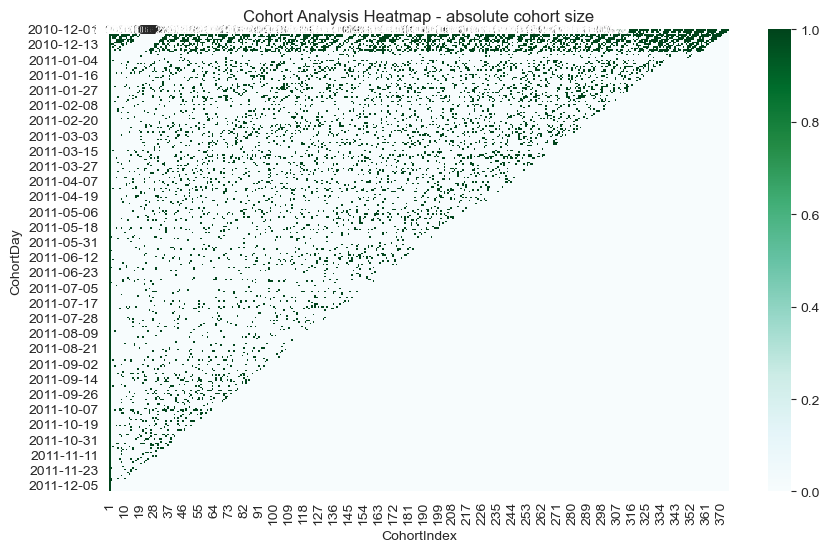

In [643]:
plt.figure(figsize=(10, 6))
plt.title('Cohort Analysis Heatmap - absolute cohort size')
sns.heatmap(data = cohort_table_2_nv,
annot = True,
fmt = '.0%',
vmin = 0.0,
vmax = 1,
cmap = 'BuGn')
plt.show()


<h2>Calculating retention rate</h2>

In [644]:
cohort_retention = cohort_table_2_nv.copy()

In [645]:
cohort_sizes = cohort_retention.iloc[:,0]

cohort_sizes 

CohortDay
2010-12-01    69.0
2010-12-02    78.0
2010-12-03    30.0
2010-12-05    59.0
2010-12-06    57.0
              ... 
2011-12-04     5.0
2011-12-05     8.0
2011-12-06     6.0
2011-12-07     7.0
2011-12-08     5.0
Freq: D, Name: 1, Length: 304, dtype: float64

In [646]:
retention = cohort_retention.divide(cohort_sizes, axis=0)

print(retention.iloc[:4, :6])

CohortIndex    1         2         3         4         5         6
CohortDay                                                         
2010-12-01   1.0  0.043478  0.014493  0.000000  0.043478  0.072464
2010-12-02   1.0  0.000000  0.000000  0.000000  0.012821  0.038462
2010-12-03   1.0  0.000000  0.033333  0.033333  0.000000  0.000000
2010-12-05   1.0  0.050847  0.033898  0.016949  0.067797  0.033898


In [647]:
retention_rates = retention.round(3)*100
print(retention_rates.iloc[:4, :6])

CohortIndex      1    2    3    4    5    6
CohortDay                                  
2010-12-01   100.0  4.3  1.4  0.0  4.3  7.2
2010-12-02   100.0  0.0  0.0  0.0  1.3  3.8
2010-12-03   100.0  0.0  3.3  3.3  0.0  0.0
2010-12-05   100.0  5.1  3.4  1.7  6.8  3.4


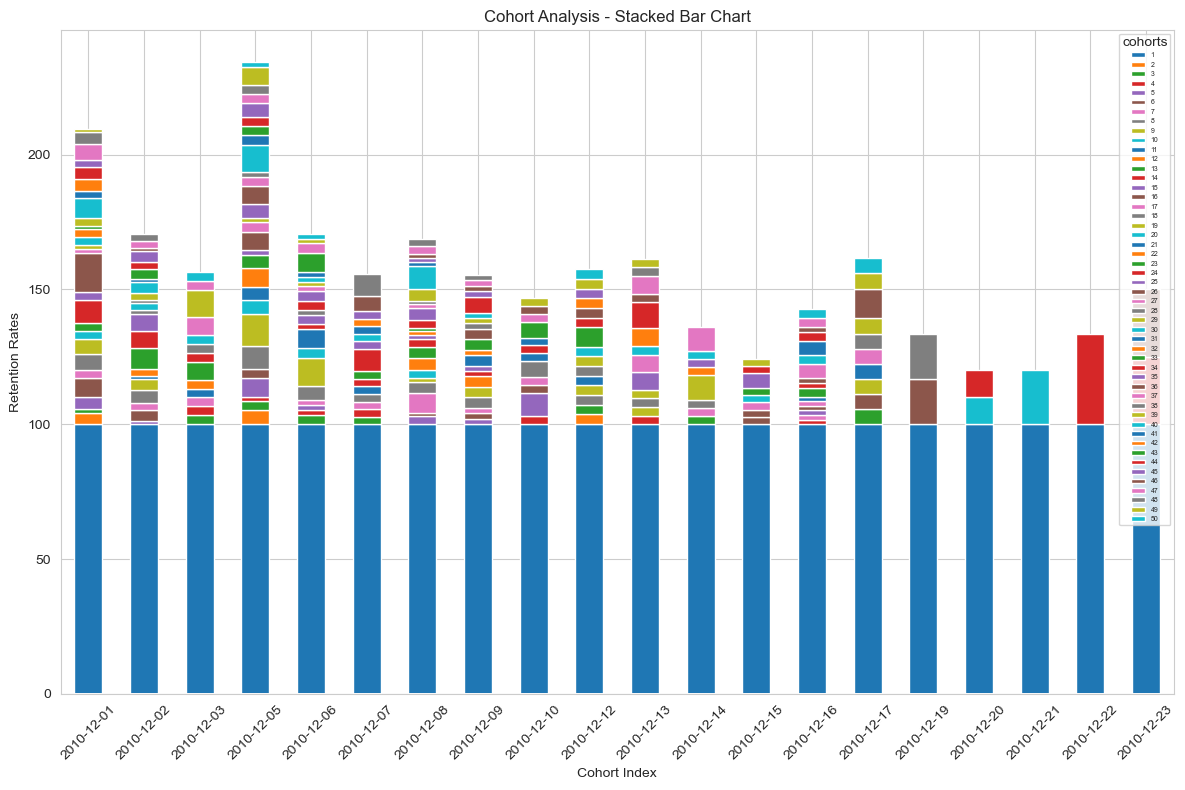

In [648]:
retention_rates.iloc[:20, :50].plot(kind='bar', stacked=True, figsize=(12, 8),
                                    legend=False)
plt.title('Cohort Analysis - Stacked Bar Chart')
plt.xlabel('Cohort Index')
plt.ylabel('Retention Rates')
plt.xticks(rotation=45)
plt.legend(fontsize=5, loc="upper right", title='cohorts')
plt.tight_layout()
plt.show()


<h3>Calculating average quantity</h3>

In [649]:
print(online.columns.tolist())
grouping_avq = online.groupby(['CohortDay', 'CohortIndex'])

['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country', 'InvoiceDay', 'CohortDay', 'Cohort_number', 'CohortIndex']


In [650]:
cohort_data_avg = grouping_avq['Quantity'].mean()
print(cohort_data_avg[:100])

CohortDay   CohortIndex
2010-12-01  1              11.247761
            2               9.052632
            3               8.000000
            5               4.304348
            6              13.437500
                             ...    
            145            27.000000
            146             1.333333
            151             4.111111
            152            18.454545
            153             1.647059
Name: Quantity, Length: 100, dtype: float64


In [651]:
cohort_data_avg = cohort_data_avg.reset_index()

print(cohort_data_avg[:3])

    CohortDay  CohortIndex   Quantity
0  2010-12-01            1  11.247761
1  2010-12-01            2   9.052632
2  2010-12-01            3   8.000000


In [652]:
avg_quantity_table = cohort_data_avg.pivot(index='CohortDay',
                                           columns='CohortIndex',
                                           values = 'Quantity')

In [653]:
avg_quantity_table = avg_quantity_table.fillna(0).round(2)

In [654]:
avg_quantity_table.isnull().sum().sum()

0

In [655]:
print(avg_quantity_table.info())

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 304 entries, 2010-12-01 to 2011-12-08
Freq: D
Columns: 374 entries, 1 to 374
dtypes: float64(374)
memory usage: 890.6 KB
None


In [656]:
print(avg_quantity_table.iloc[:4, :6])

CohortIndex      1     2     3     4     5      6
CohortDay                                        
2010-12-01   11.25  9.05  8.00  0.00  4.30  13.44
2010-12-02   13.51  0.00  0.00  0.00  2.67   7.92
2010-12-03    8.83  0.00  3.67  1.14  0.00   0.00
2010-12-05    5.68  6.48  5.20  4.88  3.31   7.58


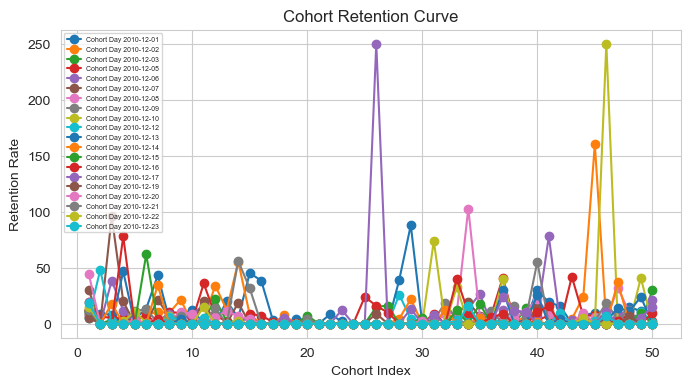

In [657]:
# Example using Matplotlib
plt.figure(figsize=(8, 4))
for cohort_day, values in avg_quantity_table.iloc[:20, :50].iterrows():
    plt.plot(values.index, values.values, marker='o', label=f'Cohort Day {cohort_day}')

plt.title('Cohort Retention Curve')
plt.xlabel('Cohort Index')
plt.ylabel('Retention Rate')
plt.legend(loc='upper left', fontsize=5)
plt.grid(True)
plt.show()

<h3>Calculating average unit price</h3>

In [658]:
grouping_unitprice = online.groupby(['CohortDay', 'CohortIndex'])
cohort_data_unitprice = grouping_unitprice['UnitPrice'].mean()
cohort_data_unitprice = cohort_data_unitprice.reset_index()

unitprice_pivot = \
cohort_data_unitprice.pivot(index='CohortDay', columns='CohortIndex', values='UnitPrice')

unitprice_pivot = unitprice_pivot.fillna(0).round(2)

In [659]:
cohort_data_unitprice.head()

,CohortDay,CohortIndex,UnitPrice
0,2010-12-01,1,3.023552
1,2010-12-01,2,2.586842
2,2010-12-01,3,5.542500
3,2010-12-01,5,2.363043
4,2010-12-01,6,2.840000


In [660]:
unitprice_pivot.iloc[:8, :8]

CohortIndex,1,2,3,4,5,6,7,8
CohortDay,,,,,,,,
2010-12-01,3.02,2.59,5.54,0.00,2.36,2.84,3.01,3.73
2010-12-02,3.05,0.00,0.00,0.00,1.67,2.78,2.49,4.81
2010-12-03,3.25,0.00,1.88,2.96,0.00,0.00,2.92,0.00
2010-12-05,2.74,2.35,2.22,1.97,4.62,2.75,0.00,2.19
2010-12-06,2.66,0.00,1.75,1.93,4.28,0.00,2.87,2.43
2010-12-07,3.30,0.00,19.94,3.75,0.00,0.00,1.89,3.53
2010-12-08,2.83,0.00,0.00,0.00,2.91,1.85,4.17,3.19
2010-12-09,2.82,0.00,0.00,0.00,2.52,5.08,2.42,2.69


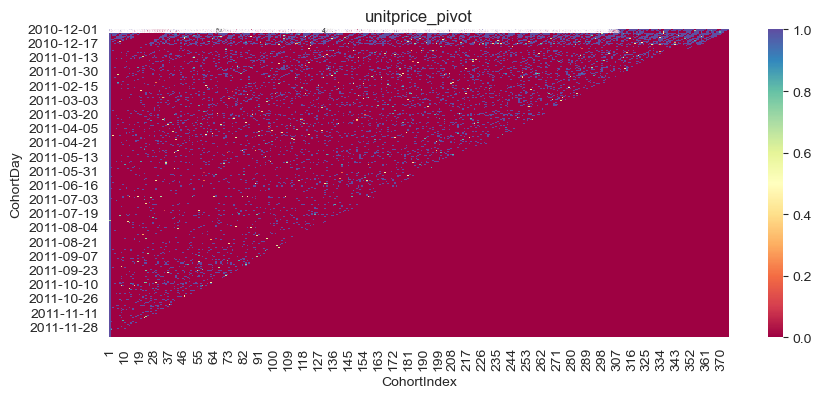

In [661]:
plt.figure(figsize=(10, 4))
plt.title('unitprice_pivot')
sns.heatmap(data = unitprice_pivot,
annot = True,
fmt = '.0%',
vmin = 0.0,
vmax = 1,
cmap = 'Spectral', 
annot_kws={"fontsize": 5})
plt.show()

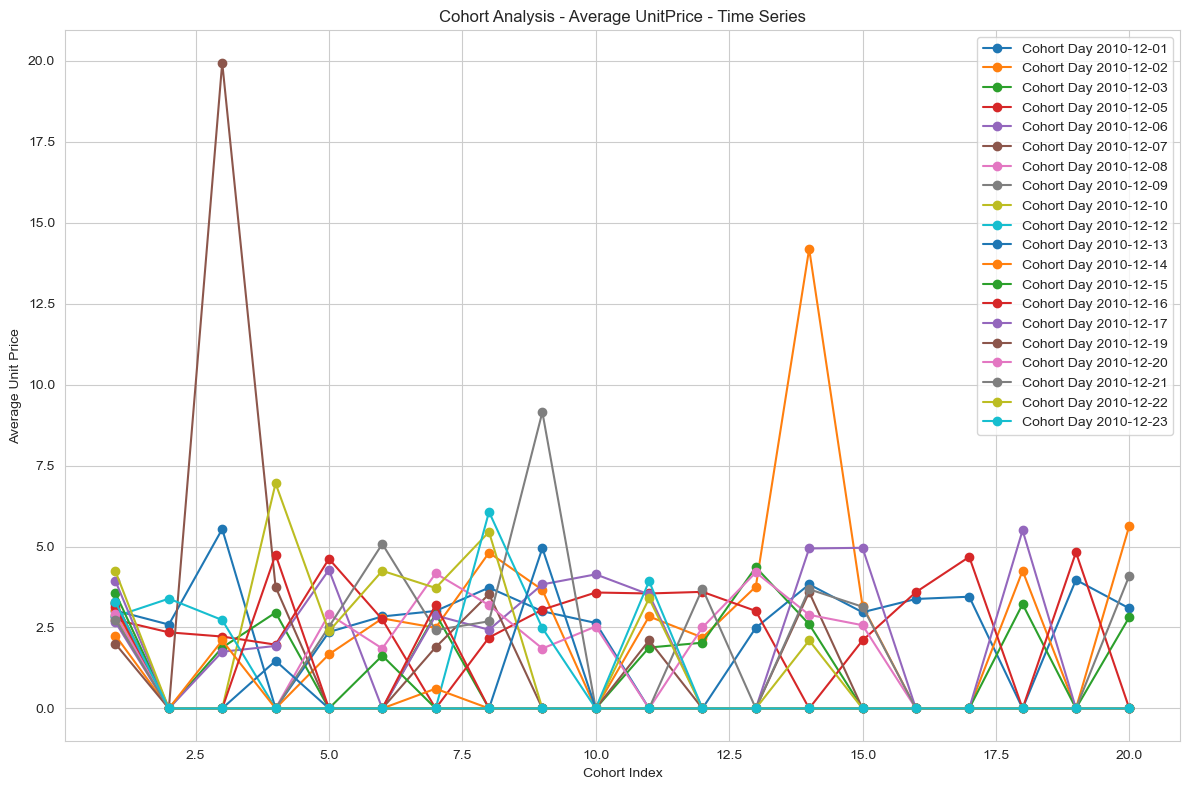

In [662]:
# Example using Pandas and Matplotlib
plt.figure(figsize=(12, 8))
for cohort_day, values in unitprice_pivot.iloc[:20, :20].iterrows():
    plt.plot(unitprice_pivot.iloc[:20, :20].columns, values, marker='o', label=f'Cohort Day {cohort_day}')

plt.title('Cohort Analysis - Average UnitPrice - Time Series')
plt.xlabel('Cohort Index')
plt.ylabel('Average Unit Price')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()
